In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

<br>
<br>
<br>

### Data collection and inspection

In [2]:
# importing training and test data
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [3]:
# inspecting training data
train_data.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
# inspecting test data
test_data.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [5]:
# training data shape
train_data.shape

(37137, 10)

In [6]:
# test data shape
test_data.shape

(24759, 9)

In [7]:
# training data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [8]:
# test data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24759 non-null  int64  
 1   MedInc      24759 non-null  float64
 2   HouseAge    24759 non-null  float64
 3   AveRooms    24759 non-null  float64
 4   AveBedrms   24759 non-null  float64
 5   Population  24759 non-null  float64
 6   AveOccup    24759 non-null  float64
 7   Latitude    24759 non-null  float64
 8   Longitude   24759 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


In [9]:
# checking for null values
train_data.isna().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
# checking for null values
test_data.isna().sum()

id            0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<br>
<br>
<br>

### EDA

#### median house value

In [11]:
# descriptive stats
train_data.MedHouseVal.describe()

count    37137.000000
mean         2.079751
std          1.158571
min          0.149990
25%          1.208000
50%          1.808000
75%          2.660000
max          5.000010
Name: MedHouseVal, dtype: float64

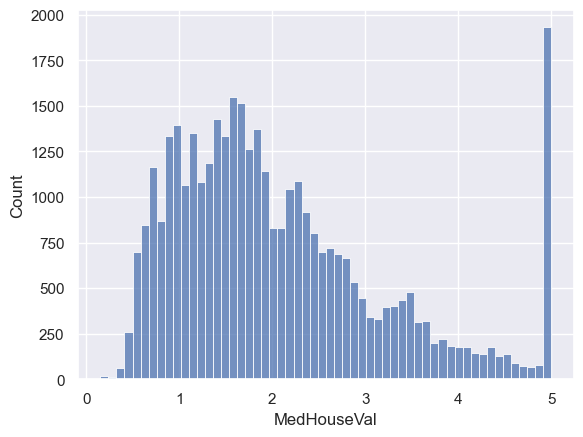

In [12]:
# histogram
sns.histplot(x=train_data.MedHouseVal)
plt.show()

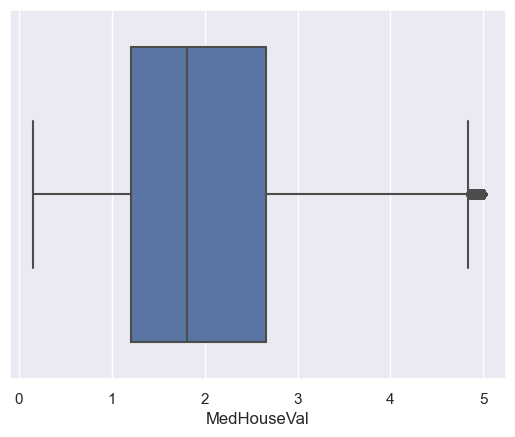

In [13]:
# boxplot
sns.boxplot(x=train_data.MedHouseVal)
plt.show()

note:
- outliers are capped to 5.0

<br>
<br>

#### median income

In [14]:
# descriptive stats
train_data.MedInc.describe()

count    37137.000000
mean         3.851029
std          1.803167
min          0.499900
25%          2.602300
50%          3.515600
75%          4.699700
max         15.000100
Name: MedInc, dtype: float64

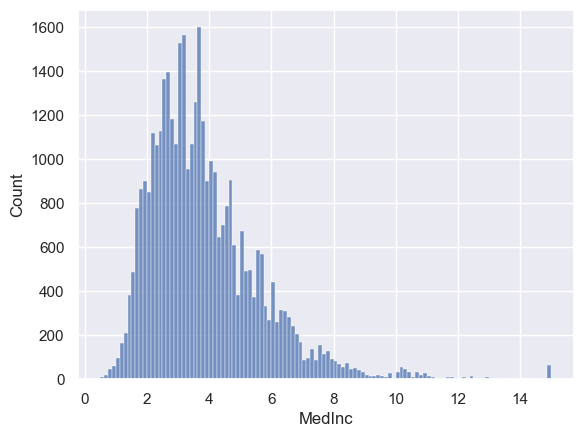

In [15]:
# histogram
sns.histplot(x=train_data.MedInc)
plt.show()

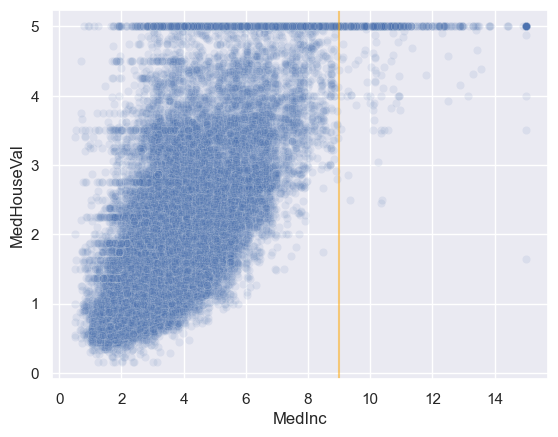

In [16]:
# scatter plot
sns.scatterplot(data=train_data, x="MedInc", y="MedHouseVal", alpha=0.1)
plt.axvline(9.0, color='orange', alpha=0.5)
plt.show()

In [17]:
# median_income sereis
median_income = train_data.MedInc
median_income.head()

0    2.3859
1    3.7188
2    4.7750
3    2.4138
4    3.7500
Name: MedInc, dtype: float64

In [18]:
# count of datapoints having median_income > 9.0
len(median_income[median_income > 9.0])

583

In [19]:
# correlation
np.corrcoef(train_data.MedInc, train_data.MedHouseVal)[0][1]

0.7019252743097321

note:
- outliers are capped at 15
- datapoints after 9.0 MedInc have 5.0 MedHouseVal

actions:
- create income_category feature with 2 categories: `income <= 9.0` & `income > 9.0`

<br>
<br>

#### house age

In [20]:
# descriptive stats
train_data.HouseAge.describe()

count    37137.000000
mean        26.057005
std         12.158221
min          2.000000
25%         17.000000
50%         25.000000
75%         35.000000
max         52.000000
Name: HouseAge, dtype: float64

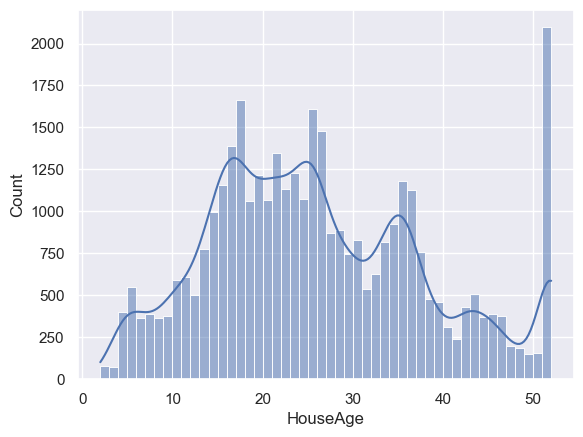

In [21]:
# histogram
sns.histplot(x=train_data.HouseAge, bins=50, kde=True)
plt.show()

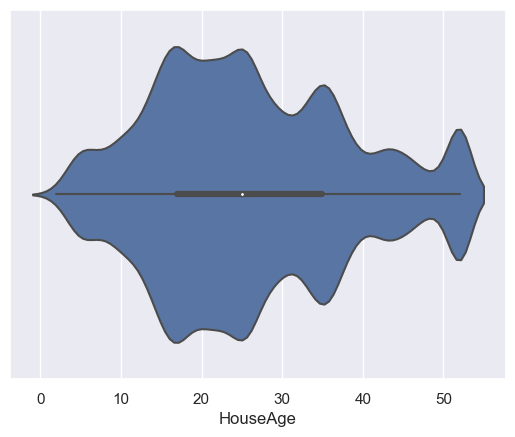

In [22]:
# violin plot
sns.violinplot(x=train_data.HouseAge)
plt.show()

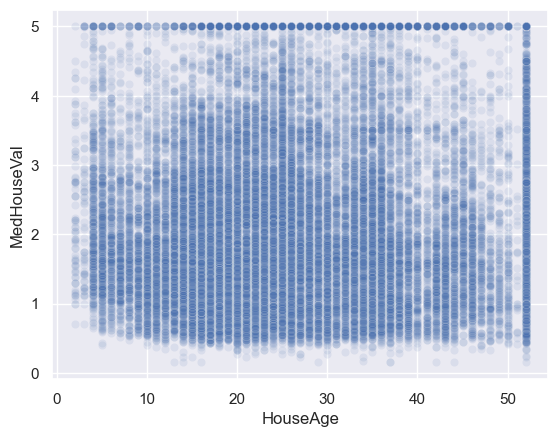

In [23]:
# scatter plot
sns.scatterplot(data=train_data, x="HouseAge", y="MedHouseVal", alpha=0.1)
plt.show()

In [24]:
# correlation
np.corrcoef(train_data.HouseAge, train_data.MedHouseVal)[0][1]

0.10321020531323191

note:
- outliers are capped at 52
- house age on its own doesn't seem to be an important feature

<br>
<br>

#### average rooms

In [25]:
# descriptive stats
train_data.AveRooms.describe()

count    37137.000000
mean         5.163124
std          1.206242
min          0.851064
25%          4.357522
50%          5.068611
75%          5.858597
max         28.837607
Name: AveRooms, dtype: float64

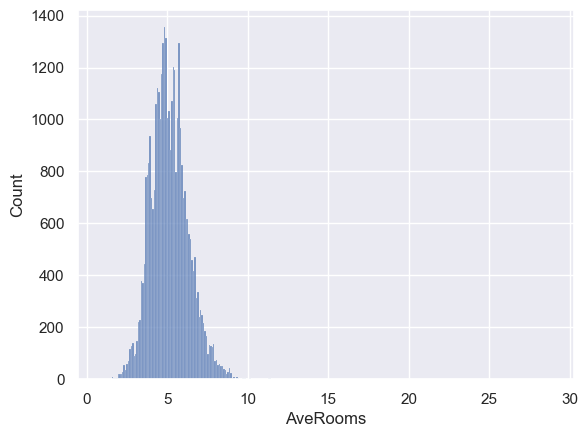

In [26]:
# histogram
sns.histplot(x=train_data.AveRooms)
plt.show()

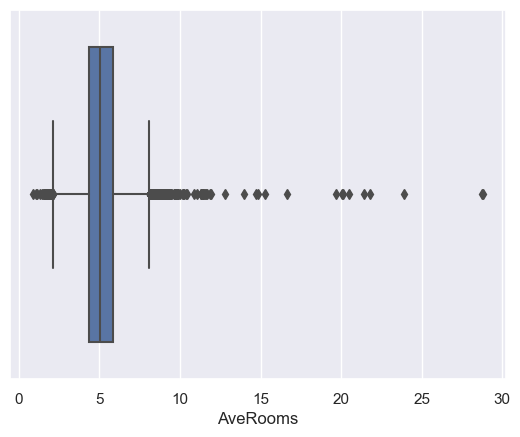

In [27]:
# boxplot
sns.boxplot(x=train_data.AveRooms)
plt.show()

In [28]:
# seperating average_rooms
average_rooms = train_data.AveRooms
average_rooms.head()

0    3.827160
1    6.013373
2    6.535604
3    3.350203
4    4.284404
Name: AveRooms, dtype: float64

In [29]:
# count of average_rooms > 10
len(average_rooms[average_rooms > 10])

36

In [30]:
# percentage of outliers
36/37000 * 100

0.09729729729729729

note:
- few outliers are present

action:
- remove instances where average_rooms > 10

In [31]:
# keeping values <= 10
average_rooms = average_rooms[average_rooms <= 10]
average_rooms.describe()

count    37101.000000
mean         5.153978
std          1.159073
min          0.851064
25%          4.357143
50%          5.067485
75%          5.857143
max         10.000000
Name: AveRooms, dtype: float64

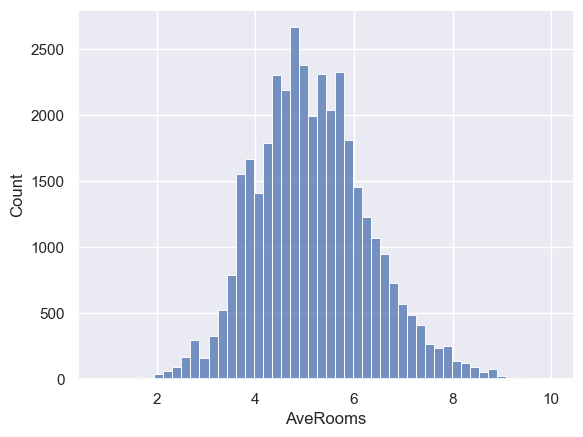

In [32]:
# histogram
sns.histplot(x=average_rooms, bins=50)
plt.show()

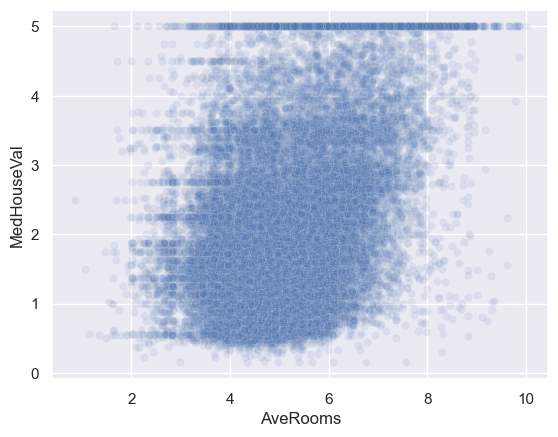

In [33]:
# scatter plot
sns.scatterplot(x=average_rooms, y=train_data.iloc[average_rooms.index].MedHouseVal, alpha=0.1)
plt.show()

In [34]:
# correlation
np.corrcoef(average_rooms, train_data.iloc[average_rooms.index].MedHouseVal)[0][1]

0.3841650886657324

note:
- average_rooms seems somewhat corelated to the target

<br>
<br>

#### average bedrooms

In [35]:
# descriptive stats
train_data.AveBedrms.describe()

count    37137.000000
mean         1.062204
std          0.096490
min          0.500000
25%          1.020305
50%          1.054545
75%          1.088825
max          5.873181
Name: AveBedrms, dtype: float64

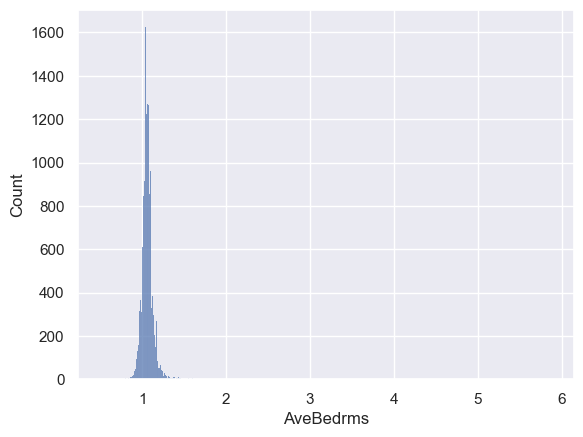

In [36]:
# histogram
sns.histplot(x=train_data.AveBedrms)
plt.show()

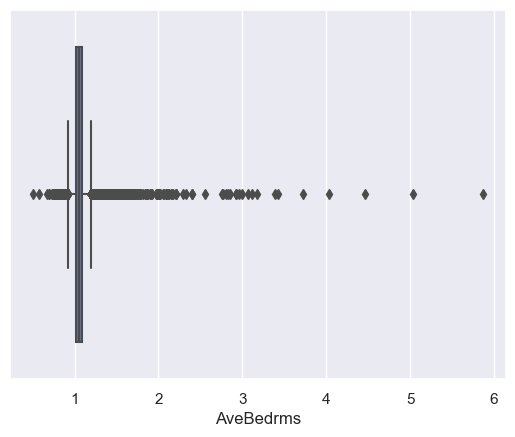

In [37]:
# boxplot
sns.boxplot(x=train_data.AveBedrms)
plt.show()

note:
- outliers present

In [38]:
# seperating average bedrooms
average_bedrooms = train_data.AveBedrms
average_bedrooms.head()

0    1.112100
1    1.054217
2    1.103175
3    0.965432
4    1.069246
Name: AveBedrms, dtype: float64

In [39]:
# count of values greater than 2.0
len(average_bedrooms[average_bedrooms > 2.0])

41

action:
- removing datapoints where average_bedrooms > 2.0

In [40]:
# keeping value less than 2.0
average_bedrooms = average_bedrooms[average_bedrooms <= 2.0]
average_bedrooms.describe()

count    37096.000000
mean         1.060334
std          0.073144
min          0.500000
25%          1.020270
50%          1.054502
75%          1.088657
max          2.000000
Name: AveBedrms, dtype: float64

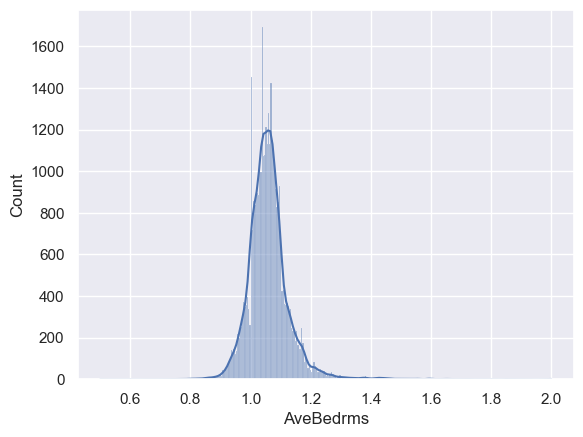

In [41]:
# updated histogram
sns.histplot(x=average_bedrooms, kde=True)
plt.show()

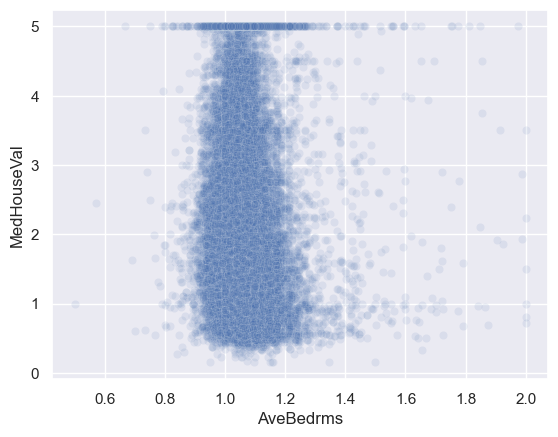

In [42]:
# scatter plot
sns.scatterplot(x=average_bedrooms, y=train_data.iloc[average_bedrooms.index].MedHouseVal, alpha=0.1)
plt.show()

In [43]:
# correlation
np.corrcoef(average_bedrooms, train_data.iloc[average_bedrooms.index].MedHouseVal)[0][1]

-0.07368847013245027

note:
- average bedrooms does not seem an important factor alone

<br>
<br>

#### population

In [44]:
# descriptive stats
train_data.Population.describe()

count    37137.000000
mean      1660.778919
std       1302.469608
min          3.000000
25%        952.000000
50%       1383.000000
75%       1856.000000
max      35682.000000
Name: Population, dtype: float64

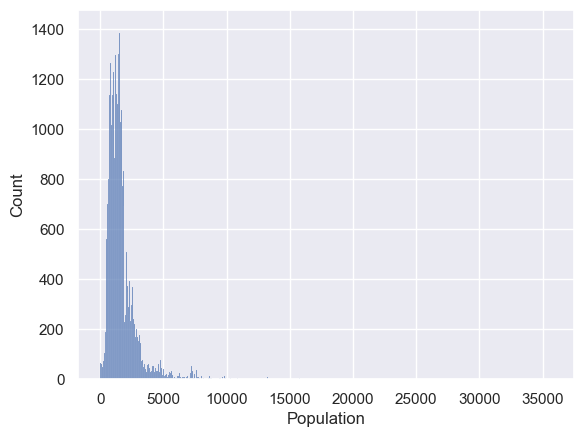

In [45]:
# histogram
sns.histplot(x=train_data.Population)
plt.show()

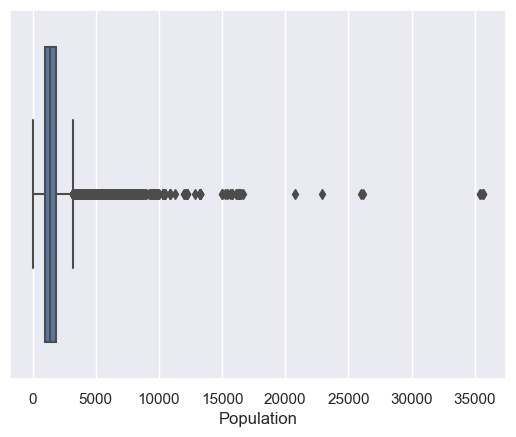

In [46]:
# boxplot
sns.boxplot(x=train_data.Population)
plt.show()

note:
- outliers present

In [47]:
# seperating population
population = train_data.Population
population.head()

0    1280.0
1    1504.0
2    1061.0
3    1255.0
4    1793.0
Name: Population, dtype: float64

In [48]:
# count of values greater than 10,000
len(population[population > 10000])

59

In [49]:
# keeping values less than 10,000
population = population[population <= 10000]
population.describe()

count    37078.000000
mean      1638.032869
std       1139.663683
min          3.000000
25%        951.000000
50%       1382.000000
75%       1853.000000
max       9999.000000
Name: Population, dtype: float64

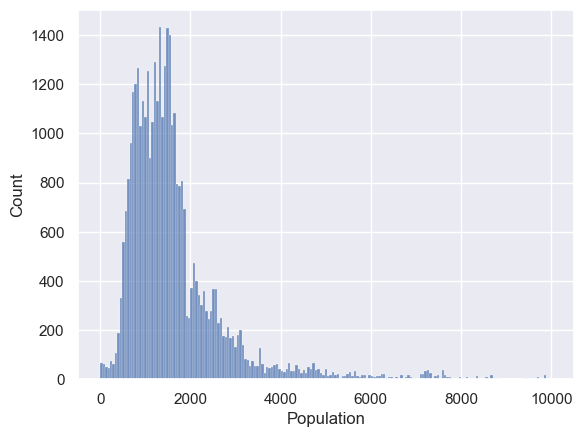

In [50]:
# updated histogram
sns.histplot(x=population)
plt.show()

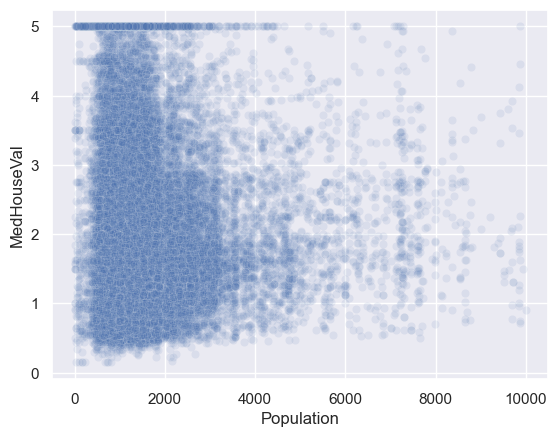

In [51]:
# scatter plot
sns.scatterplot(x=population, y=train_data.iloc[population.index].MedHouseVal, alpha=0.1)
plt.show()

In [52]:
# correlation
np.corrcoef(population, train_data.iloc[population.index].MedHouseVal)[0][1]

-0.045109881501226995

note:
- not an important feature alone
- combine with others

<br>
<br>

#### average occupants in a house

In [53]:
# descriptive stats
train_data.AveOccup.describe()

count    37137.000000
mean         2.831243
std          2.702413
min          0.950000
25%          2.394495
50%          2.744828
75%          3.125313
max        502.990610
Name: AveOccup, dtype: float64

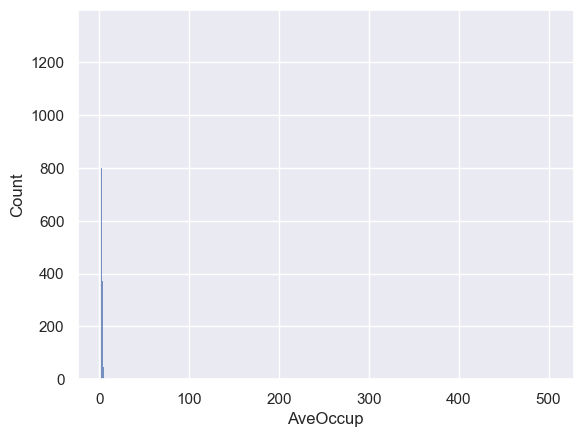

In [54]:
# histogram
sns.histplot(x=train_data.AveOccup)
plt.show()

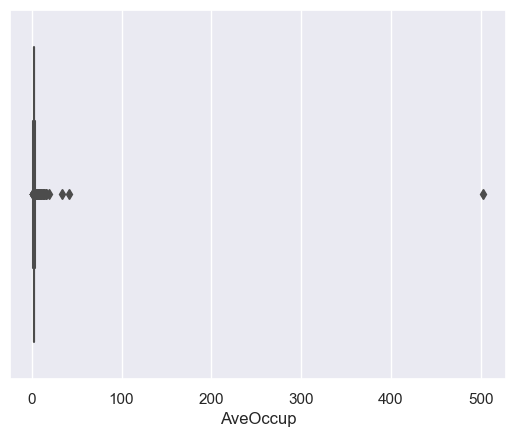

In [55]:
# boxplot
sns.boxplot(x=train_data.AveOccup)
plt.show()

note:
- outliers present

In [56]:
# seperating average occupants
average_occupants = train_data.AveOccup
average_occupants.head()

0    2.486989
1    3.813084
2    2.464602
3    2.089286
4    1.604790
Name: AveOccup, dtype: float64

In [57]:
# count of values greater than 7
len(average_occupants[average_occupants > 7])

38

In [58]:
# keeping values less than 7
average_occupants = average_occupants[average_occupants <= 7]
average_occupants.describe()

count    37099.000000
mean         2.808545
std          0.659284
min          0.950000
25%          2.394007
50%          2.744425
75%          3.124449
max          6.968750
Name: AveOccup, dtype: float64

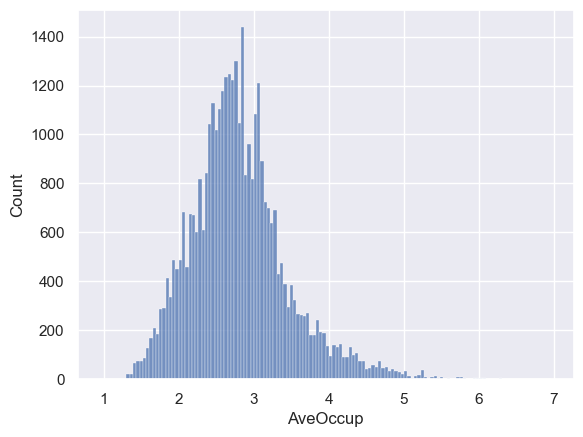

In [59]:
# updated histogram
sns.histplot(x=average_occupants)
plt.show()

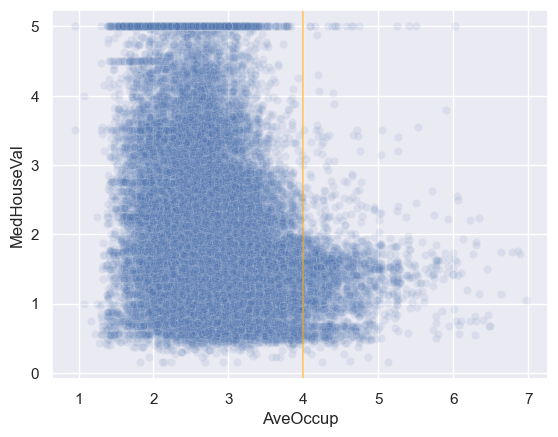

In [75]:
# scatter plot
sns.scatterplot(x=average_occupants, y=train_data.iloc[average_occupants.index].MedHouseVal, alpha=0.1)
plt.axvline(4.0, color='orange', alpha=0.5)
plt.show()

In [61]:
# correlation
np.corrcoef(average_occupants, train_data.iloc[average_occupants.index].MedHouseVal)[0][1]

-0.24072210325001925

action:
- create bins [0, 4.0, 7]

<br>
<br>

#### latitude & longitude

In [76]:
train_data.Latitude.describe()

count    37137.000000
mean        35.570030
std          2.083179
min         32.550000
25%         33.930000
50%         34.190000
75%         37.700000
max         41.950000
Name: Latitude, dtype: float64

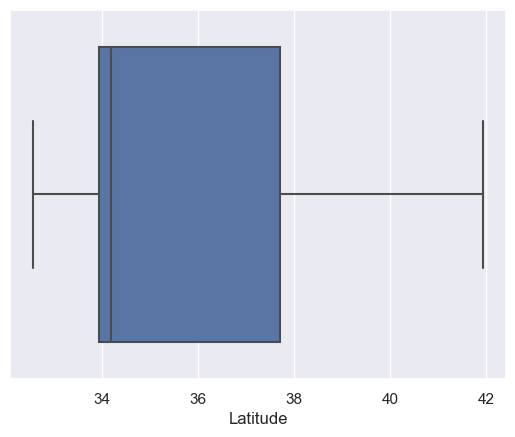

In [62]:
# latitude boxplot
sns.boxplot(x=train_data.Latitude)
plt.show()

In [77]:
train_data.Longitude.describe()

count    37137.000000
mean      -119.554329
std          1.974028
min       -124.350000
25%       -121.800000
50%       -118.450000
75%       -118.020000
max       -114.550000
Name: Longitude, dtype: float64

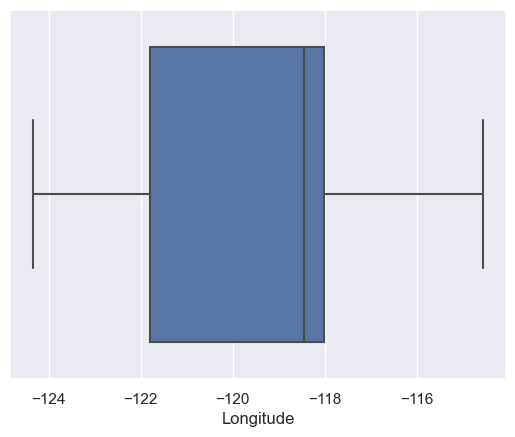

In [63]:
# longitude boxplot
sns.boxplot(x=train_data.Longitude)
plt.show()

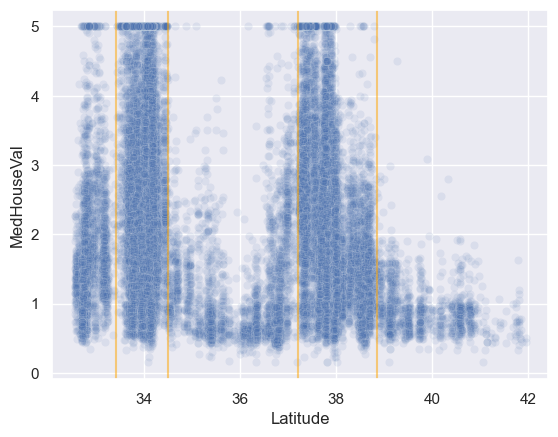

In [64]:
# latitude scatter plot against target
sns.scatterplot(x=train_data.Latitude, y=train_data.MedHouseVal, alpha=0.1)
plt.axvline(33.40, color='orange', alpha=0.5)
plt.axvline(34.50, color='orange', alpha=0.5)
plt.axvline(37.20, color='orange', alpha=0.5)
plt.axvline(38.85, color='orange', alpha=0.5)
plt.show()

action:
- bins [0, 33.40, 34.50, 37.20, 38.85, 43]

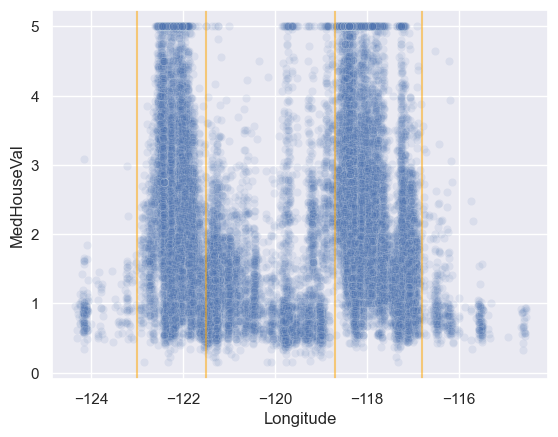

In [65]:
# longitude scatter plot against target
sns.scatterplot(x=train_data.Longitude, y=train_data.MedHouseVal, alpha=0.1)
plt.axvline(-123.00, color='orange', alpha=0.5)
plt.axvline(-121.50, color='orange', alpha=0.5)
plt.axvline(-118.70, color='orange', alpha=0.5)
plt.axvline(-116.80, color='orange', alpha=0.5)
plt.show()

action:
- bins [-125, -123.00, -121.50, -118.70, -116.80, -112]

<br>

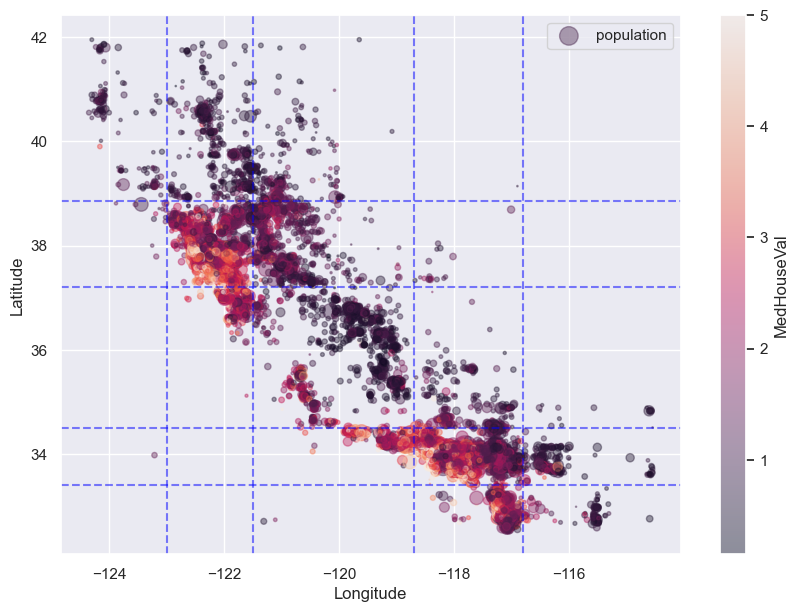

In [66]:
# lattitude longitude scatterplot
# with population size
# and target heatmap
train_data.plot(kind="scatter", x='Longitude', y='Latitude', alpha=0.4, s=train_data.Population/100, label='population', figsize=(10, 7), c='MedHouseVal', cmap=plt.get_cmap('jet'), colorbar=True)

# longitude divisions
plt.axvline(-123.00, color='blue', alpha=0.5, linestyle='--')
plt.axvline(-121.50, color='blue', alpha=0.5, linestyle='--')
plt.axvline(-118.70, color='blue', alpha=0.5, linestyle='--')
plt.axvline(-116.80, color='blue', alpha=0.5, linestyle='--')

# latitide divisions
plt.axhline(33.40, color='blue', alpha=0.5, linestyle='--')
plt.axhline(34.50, color='blue', alpha=0.5, linestyle='--')
plt.axhline(37.20, color='blue', alpha=0.5, linestyle='--')
plt.axhline(38.85, color='blue', alpha=0.5, linestyle='--')

plt.legend()
plt.show()

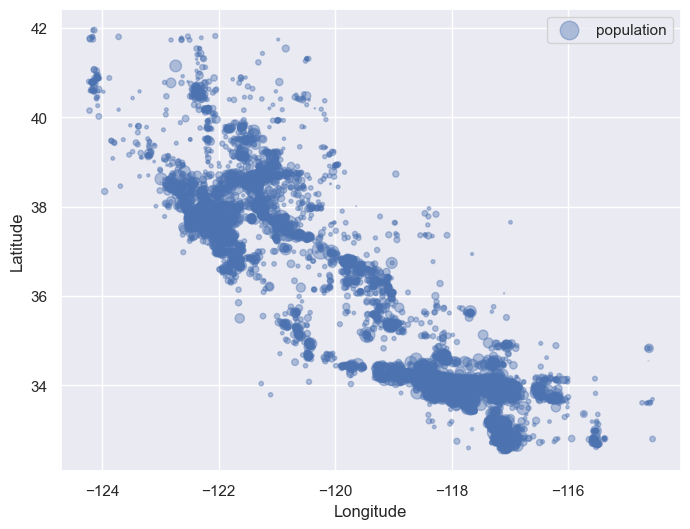

In [74]:
test_data.plot(kind="scatter", x='Longitude', y='Latitude', alpha=0.4, s=test_data.Population/100, label='population', figsize=(8, 6))
plt.show()

note:
- train and test data seems to be proportionate by location

<br>
<br>
<br>
<br>
<br>

### Conclusion

feature engineering:
- number of houses
- average people per room
- bedrooms to rooms ratio